<a href="https://colab.research.google.com/github/diliprc96/Multi_armed_Bandit/blob/main/MAB_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### `---------------Mandatory Information to fill------------`

### Group ID: 160
### Group Members Name with Student ID:
1. Dilip R 2023ad05030
2. Bharat
3. Ishwar
4. Hritej


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Background

In the world of online streaming, user satisfaction and engagement are critical metrics for the success of a movie recommendation system. A well-designed recommendation algorithm can significantly enhance user experience by suggesting movies that align with their preferences, leading to higher platform retention and usage. Recommendation systems face the challenge of balancing exploration (discovering new movies) with exploitation (recommending known favourites) to maximize user satisfaction over time.


# Scenario

Imagine a leading online movie streaming platform, TrendMovie Inc., that aims to become the go-to destination for personalized movie recommendations. The platform features a vast collection of movies catering to diverse audiences. TrendMovie Inc. wants to optimize its recommendation strategy to deliver maximum user satisfaction while maintaining a high level of engagement. Each movie recommendation is treated as an interaction with the user, and their feedback is used to refine the recommendation strategy dynamically.


# Objective

Your objective is to design and implement a recommendation system using Multi-Armed Bandit (MAB) algorithms to maximize cumulative user satisfaction. The system should dynamically allocate recommendations by learning user preferences in real-time, striking the right balance between exploration and exploitation.


# Dataset

The dataset contains user ratings for a variety of movies. Key columns in the dataset include:
*   **User ID:** A unique identifier for each user.
*   **Movie ID:** A unique identifier for each.
*   **Rating:** A score provided by the user for a movie (on a scale of 1 to 5).
*   **Timestamp:** The time when the rating was given (optional for this assignment).

***Link for accessing dataset:***
https://drive.google.com/file/d/1gfobhqlVCw8Oo52JCiYpEBGhG5k7cWBr/view?usp=drive_link


# Environment Details

**Arms:** Each movie represents an "arm" in the MAB framework. The probability of a movie being liked by a user is initially unknown and will be estimated based on user feedback during the interactions.
For example:

Arm 1: Movie A

Arm 2: Movie B

Arm 3: Movie C

... and so on, for all movies in the dataset.

**Reward Function:**
The reward function is defined based on user ratings:

***Reward = 1:*** The user rates the movie high star (e.g., 4 or 5 stars).

***Reward = 0:*** The user rates the movie low star (e.g., 1, 2, or 3 stars).


**Assumptions:**

Run simulations for 1000 iterations for each policy


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [3]:
# Constants
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize value function and policy

# Load Dataset (0.5M)

In [ ]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TrendMovie.csv') # Load the dataset into a pandas DataFrame

print(df.head()) # Displays the first few rows of the dataset
# Since the userId and movieId are not actual numerical value rather a representation, they are converted to categorical data type.
df['userId'] = pd.Categorical(df['userId'])
df['movieId'] = pd.Categorical(df['movieId'])
# Convert timestamp to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df.info()) # prints data types and memory usage
print(df.describe()) #Print descriptive statistics of the numerical columns like rating in our case
print(f'There are a total of {df["userId"].unique().size} users in the dataset')
print(f'There are a total of {df["movieId"].unique().size} movies in the dataset')
print('Below table shows total number of movies with each rating')
print(df['rating'].value_counts())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  category      
 1   movieId    100836 non-null  category      
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 2.3 MB
None
              rating                      timestamp
count  100836.000000                         100836
mean        3.501557  1970-01-01 00:00:01.205946087
min         0.500000  1970-01-01 00:00:00.828124615
25%         3.000000  1970-01-01 00:00:01.019123866
50%         3.500000  1970-01-01 00:0

Rating skewness: -0.6371993892529214
Most frequent rating: 4.0
Top 10 most active users:
 userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: rating, dtype: int64
Top 10 most rated movies:
 movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: rating, dtype: int64


<ipython-input-4-2fc62a25305e>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_active_users = df.groupby('userId')['rating'].count().sort_values(ascending=False)
<ipython-input-4-2fc62a25305e>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_movies = df.groupby('movieId')['rating'].count().sort_values(ascending=False)


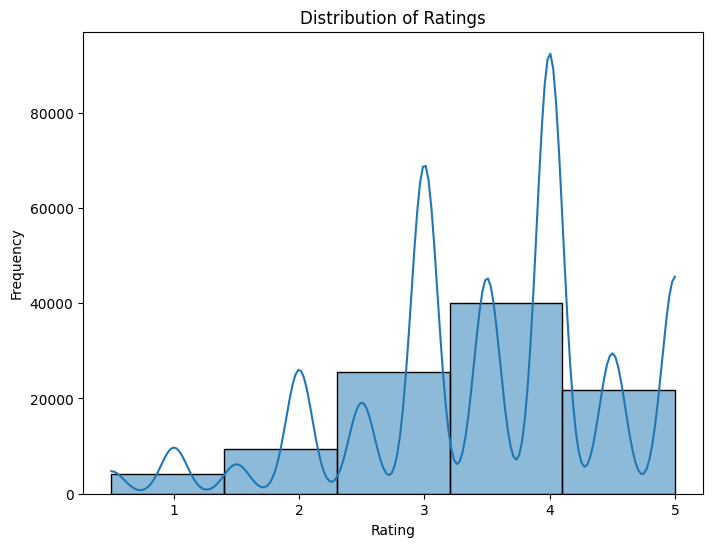

Top 10 Most Active Users (Table):
     User ID  Number of Ratings
1       414               2698
2       599               2478
3       474               2108
4       448               1864
5       274               1346
..      ...                ...
606     442                 20
607     569                 20
608     320                 20
609     576                 20
610      53                 20

[610 rows x 2 columns]
Top 10 Most Popular Movies (Table):
    Movie ID  Number of Ratings
1       356                329
2       318                317
3       296                307
4       593                279
5      2571                278
6       260                251
7       480                238
8       110                237
9       589                224
10      527                220


In [ ]:
# Skewness of ratings
rating_skew = df['rating'].skew()
print(f"Rating skewness: {rating_skew}")

# Most frequent rating
most_frequent_rating = df['rating'].mode()[0]  # Get the first mode (in case of multiple modes)
print(f"Most frequent rating: {most_frequent_rating}")

# Active users
top_active_users = df.groupby('userId')['rating'].count().sort_values(ascending=False)
print("Top 10 most active users:\n", top_active_users.head(10))

# Popular movies
popular_movies = df.groupby('movieId')['rating'].count().sort_values(ascending=False)
print("Top 10 most rated movies:\n", popular_movies.head(10))

# 1. Rating Distribution Visualization:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=True)  # Histogram with kernel density estimate
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# 2. Ordered Table for Top 10 Active Users:
top_active_users_table = top_active_users.reset_index(name='Number of Ratings')
top_active_users_table.index = top_active_users_table.index + 1  # Add rank column
top_active_users_table = top_active_users_table.rename(columns={'userId': 'User ID'})
print("Top 10 Most Active Users (Table):\n", top_active_users_table)

# 2. Ordered Table for Top 10 popular movies:
top_popular_movies_table = popular_movies.head(10).reset_index(name='Number of Ratings')
top_popular_movies_table.index = top_popular_movies_table.index + 1  # Add rank column
top_popular_movies_table = top_popular_movies_table.rename(columns={'movieId': 'Movie ID'})
print("Top 10 Most Popular Movies (Table):\n", top_popular_movies_table)

Time range of ratings: 1970-01-01 00:00:00.828124615 to 1970-01-01 00:00:01.537799250


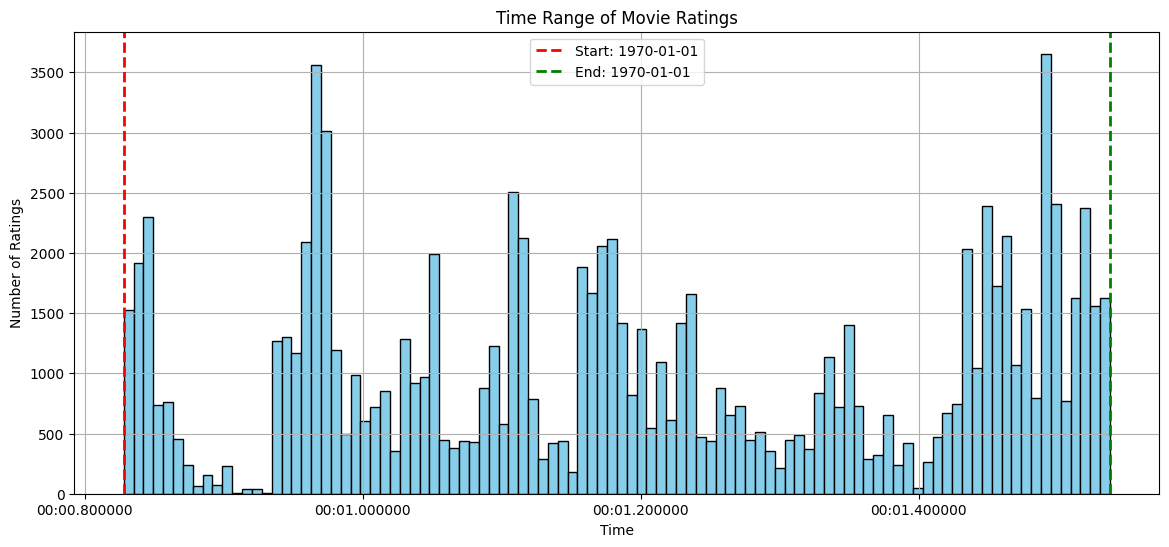

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Get the minimum and maximum dates
min_date = df['timestamp'].min()
max_date = df['timestamp'].max()

# Print the time range
print(f"Time range of ratings: {min_date} to {max_date}")

# Plotting the time range
plt.figure(figsize=(14, 6))
plt.hist(df['timestamp'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.title('Time Range of Movie Ratings')
plt.axvline(min_date, color='red', linestyle='--', linewidth=2, label=f'Start: {min_date.date()}')
plt.axvline(max_date, color='green', linestyle='--', linewidth=2, label=f'End: {max_date.date()}')
plt.legend()
plt.grid(True)
plt.show()


# The timestamp is not correct data, since the start and end date are same.

# Design a Movie Environment (0.5M)

In [ ]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------

class MovieEnvironment:
    def __init__(self, ratings_df):
        self.ratings_df = ratings_df
        self.num_movies = len(ratings_df['movieId'].unique())
        self.movie_ids = ratings_df['movieId'].unique()
        self.user_ratings = ratings_df.groupby('userId')[['movieId', 'rating']].agg(list).to_dict()

    def get_reward(self, user_id, movie_id):
        user_ratings = self.user_ratings.get(user_id, [])  # fetch already interacted movie for user if present
        if user_ratings and movie_id in user_ratings[0]:
            index = user_ratings[0].index(movie_id)  # finding the position
            user_rating = user_ratings[1][index]  # access corresponding rating
            reward = 1 if user_rating >= 4 else 0
            return reward
        else:
            # If this is new movie
            # assume some average user rating that may give either 0 or 1
            avg_rating = self.ratings_df[self.ratings_df['movieId'] == movie_id]['rating'].mean()
            reward = 1 if avg_rating >= 3.5 else 0
            return reward

env = MovieEnvironment(df)

In [17]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TrendMovie.csv')
# df.groupby('userId').agg(list)
# #[['movieId', 'rating']].agg(list)

,movieId,rating,timestamp
userId,,,
1,"[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,...","[4.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 4.0, 5.0, ...","[964982703, 964981247, 964982224, 964983815, 9..."
2,"[318, 333, 1704, 3578, 6874, 8798, 46970, 4851...","[3.0, 4.0, 4.5, 4.0, 4.0, 3.5, 4.0, 4.0, 4.5, ...","[1445714835, 1445715029, 1445715228, 144571488..."
3,"[31, 527, 647, 688, 720, 849, 914, 1093, 1124,...","[0.5, 0.5, 0.5, 0.5, 0.5, 5.0, 0.5, 0.5, 0.5, ...","[1306463578, 1306464275, 1306463619, 130646422..."
4,"[21, 32, 45, 47, 52, 58, 106, 125, 126, 162, 1...","[3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 5.0, 1.0, ...","[986935199, 945173447, 986935047, 945173425, 9..."
5,"[1, 21, 34, 36, 39, 50, 58, 110, 150, 153, 232...","[4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ...","[847434962, 847435238, 847434881, 847435292, 8..."
...,...,...,...
606,"[1, 7, 11, 15, 17, 18, 19, 28, 29, 32, 36, 46,...","[2.5, 2.5, 2.5, 3.5, 4.0, 4.0, 2.0, 3.5, 4.5, ...","[1349082950, 1171754710, 1174349629, 117183906..."
607,"[1, 11, 25, 34, 36, 86, 110, 112, 150, 153, 16...","[4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 2.0, 5.0, ...","[964744033, 964744602, 963078417, 963079238, 9..."
608,"[1, 2, 3, 10, 16, 19, 21, 24, 31, 32, 34, 39, ...","[2.5, 2.0, 2.0, 4.0, 4.5, 2.0, 3.5, 2.0, 3.0, ...","[1117408267, 1117490786, 1117504413, 111740848..."


# Using Random Policy (0.5M)
Implement a random policy for movie recommendations and print each iteration. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------

class RandomPolicy:
    def __init__(self, env):
        self.env = env
        self.num_movies = env.num_movies

    def recommend_movie(self, user_id):
        # Recommends a random movie from the available movies
        movie_id = random.choice(self.env.movie_ids)
        return movie_id


# Assuming you have already created a MovieEnvironment object called 'env'
random_policy = RandomPolicy(env)

# Example usage for user with ID 1
num_iterations = 1000  # Or your desired number of iterations

for iteration in range(num_iterations):
    recommended_movie_id = random_policy.recommend_movie(user_id=1)
    reward = env.get_reward(user_id=1, movie_id=recommended_movie_id)
    print(f"Iteration {iteration + 1}: Recommended movie ID: {recommended_movie_id}, Reward: {reward}")

Iteration 1: Recommended movie ID: 36850, Reward: 1
Iteration 2: Recommended movie ID: 1891, Reward: 0
Iteration 3: Recommended movie ID: 308, Reward: 1
Iteration 4: Recommended movie ID: 3514, Reward: 0
Iteration 5: Recommended movie ID: 1760, Reward: 0
Iteration 6: Recommended movie ID: 1378, Reward: 0
Iteration 7: Recommended movie ID: 2648, Reward: 1
Iteration 8: Recommended movie ID: 130444, Reward: 1
Iteration 9: Recommended movie ID: 2642, Reward: 0
Iteration 10: Recommended movie ID: 95949, Reward: 1
Iteration 11: Recommended movie ID: 5094, Reward: 0
Iteration 12: Recommended movie ID: 7167, Reward: 0
Iteration 13: Recommended movie ID: 1974, Reward: 0
Iteration 14: Recommended movie ID: 7266, Reward: 1
Iteration 15: Recommended movie ID: 4256, Reward: 1
Iteration 16: Recommended movie ID: 42734, Reward: 0
Iteration 17: Recommended movie ID: 5953, Reward: 1
Iteration 18: Recommended movie ID: 43928, Reward: 0
Iteration 19: Recommended movie ID: 128832, Reward: 1
Iteration 20: 

# Using Greedy Policy (1M)
Implement a greedy policy that always recommends the movie with the highest estimated reward and print each iteration. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------

class GreedyPolicy:
    def __init__(self, env):
        self.env = env
        self.num_movies = env.num_movies
        self.estimated_rewards = {movie_id: 0 for movie_id in env.movie_ids}  # Initialize estimates to 0
        self.movie_interactions = {movie_id: 0 for movie_id in env.movie_ids}  # Count interactions

    def recommend_movie(self, user_id):
        # Find the movie with the highest estimated reward
        best_movie_id = max(self.estimated_rewards, key=self.estimated_rewards.get)
        return best_movie_id

    def update_estimates(self, movie_id, reward):
        # Update estimated reward for the chosen movie
        self.movie_interactions[movie_id] += 1
        self.estimated_rewards[movie_id] = (
            self.estimated_rewards[movie_id] * (self.movie_interactions[movie_id] - 1) + reward
        ) / self.movie_interactions[movie_id]

In [ ]:
old_estimate = 0.5
interactions = 1

new_estimate = (old_estimate * (interactions - 1) + reward) / interactions

print(new_estimate)
new_estimate = (old_estimate * (interactions - 1) + reward) / interactions

# Assuming you have already created a MovieEnvironment object called 'env'
greedy_policy = GreedyPolicy(env)

# Example usage for user with ID 1
num_iterations = 1000

for iteration in range(num_iterations):
    recommended_movie_id = greedy_policy.recommend_movie(user_id=1)
    reward = env.get_reward(user_id=1, movie_id=recommended_movie_id)
    greedy_policy.update_estimates(recommended_movie_id, reward)  # Update estimates after each interaction
    print(f"Iteration {iteration + 1}: Recommended movie ID: {recommended_movie_id}, Reward: {reward}")

1.0


# Using Epsilon-Greedy Policy (1.5M)
Implement the epsilon-greedy policy, where with probability ε you explore (recommend a random movie) and with probability (1-ε) you exploit (recommend the best-known movie). Try with ε =0.1, 0.2, 0.5 and print each iteration. What value of ε yields the best performance? (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------

class EpsilonGreedyPolicy:
    def __init__(self, env, epsilon=0.1):  # Default epsilon is 0.1
        self.env = env
        self.num_movies = env.num_movies
        self.epsilon = epsilon
        self.estimated_rewards = {movie_id: random.uniform(0, 0.1) for movie_id in env.movie_ids}
        self.movie_interactions = {movie_id: 0 for movie_id in env.movie_ids}

    def recommend_movie(self, user_id):
        if random.random() < self.epsilon:
            # Explore: choose a random movie
            movie_id = random.choice(self.env.movie_ids)
        else:
            # Exploit: choose the movie with the highest estimated reward
            movie_id = max(self.estimated_rewards, key=self.estimated_rewards.get)
        return movie_id

    def update_estimates(self, movie_id, reward):
        self.movie_interactions[movie_id] += 1
        old_estimate = self.estimated_rewards[movie_id]
        interactions = self.movie_interactions[movie_id]
        self.estimated_rewards[movie_id] = (old_estimate * (interactions - 1) + reward) / interactions

In [ ]:

epsilon_greedy_policy = EpsilonGreedyPolicy(env, epsilon=0.1)  # You can adjust epsilon

# Example usage for 1000 iterations
for iteration in range(1000):
    recommended_movie_id = epsilon_greedy_policy.recommend_movie(user_id=1)
    reward = env.get_reward(user_id=1, movie_id=recommended_movie_id)
    epsilon_greedy_policy.update_estimates(recommended_movie_id, reward)
    print(f"Iteration {iteration + 1}: Recommended movie ID: {recommended_movie_id}, Reward: {reward}")

# Using UCB (1M)
Implement the UCB algorithm for movie recommendations and print each iteration. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------



Iteration 1: Recommended movie ID: 7445, Reward: 1
Iteration 2: Recommended movie ID: 7445, Reward: 1
Iteration 3: Recommended movie ID: 7445, Reward: 1
Iteration 4: Recommended movie ID: 7445, Reward: 1
Iteration 5: Recommended movie ID: 7445, Reward: 1
Iteration 6: Recommended movie ID: 7445, Reward: 1
Iteration 7: Recommended movie ID: 7445, Reward: 1
Iteration 8: Recommended movie ID: 7445, Reward: 1
Iteration 9: Recommended movie ID: 76093, Reward: 1
Iteration 10: Recommended movie ID: 7445, Reward: 1
Iteration 11: Recommended movie ID: 7445, Reward: 1
Iteration 12: Recommended movie ID: 7445, Reward: 1
Iteration 13: Recommended movie ID: 7445, Reward: 1
Iteration 14: Recommended movie ID: 7445, Reward: 1
Iteration 15: Recommended movie ID: 7445, Reward: 1
Iteration 16: Recommended movie ID: 7445, Reward: 1
Iteration 17: Recommended movie ID: 7445, Reward: 1
Iteration 18: Recommended movie ID: 7445, Reward: 1
Iteration 19: Recommended movie ID: 7445, Reward: 1
Iteration 20: Recomm

# Plot the cumulative rewards for all policies on a single graph to compare their performance. (0.5M)

In [ ]:
#-----write your code below this line---------

# Conclusion (0.5M)

Determine which policy performs the best based on cumulative reward. Provide a concise conclusion (250 words) summarizing the decision-making process and the trade-offs between exploration and exploitation.

`----write below this line------`